# Explore Nucleation Rates
See how nucleation rates change as a function of temperature.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

## Load Results
Each of the result folders in [the void tracking directory](../1_void-tracking) are named after the temperature and contain a file which contains the void growth and mobility functions.

In [4]:
dynamics_terms = []
for path in Path('../1_void-tracking/output/').glob('8bitTIFF-*/rate-parameters.json'):
    # Get the temperature
    temperature = float(path.parent.name.split("-")[-1][:-1])  # Directories are named [...]-[temp]C
    terms = {'temp': temperature}
    
    # Load the model parameters
    params = json.loads(path.read_text())
    terms.update(params)
    
    dynamics_terms.append(terms)
dynamics_terms = pd.DataFrame(dynamics_terms).sort_values('temp')

In [5]:
dynamics_terms

,temp,nucleation_rate,dissolution_prob
0,525.0,0.854438,0.024626
4,550.0,0.060470,0.020658
2,575.0,0.554286,0.034412
5,600.0,0.191630,0.012189
3,625.0,0.828743,0.011195
1,650.0,0.216407,0.015303


## Plot the Effect of Temperature on Growth
See if there is a consistent trend

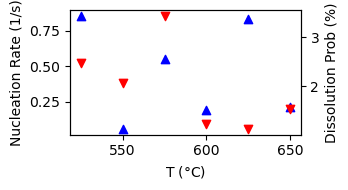

In [19]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

ax.scatter(dynamics_terms['temp'], dynamics_terms['nucleation_rate'], color='blue', marker='^')

ax2 = ax.twinx()
ax2.scatter(dynamics_terms['temp'], dynamics_terms['dissolution_prob'] * 100, color='red', marker='v')

ax.set_xlabel('T ($\\degree$C)')
ax.set_ylabel('Nucleation Rate (1/s)')
ax2.set_ylabel('Dissolution Prob (%)')


fig.tight_layout()
fig.savefig('figures/nucleation-vs-temperature.png', dpi=320)